# Team Foul Exploration

This notebook explores the team foul data gathered through the scripts in this [repository](https://github.com/basketballrelativity/team-fouls). The description of the fields available can
be found in the README file.

In [124]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [125]:
ID_TO_TEAM_NBA = {'1610612761': 'TOR', '1610612743': 'DEN',
                  '1610612765': 'DET', '1610612740': 'NOP',
                  '1610612749': 'MIL', '1610612744': 'GSW',
                  '1610612759': 'SAS', '1610612757': 'POR',
                  '1610612746': 'LAC', '1610612742': 'DAL',
                  '1610612763': 'MEM', '1610612755': 'PHI',
                  '1610612738': 'BOS', '1610612750': 'MIN',
                  '1610612766': 'CHA', '1610612754': 'IND',
                  '1610612753': 'ORL', '1610612748': 'MIA',
                  '1610612745': 'HOU', '1610612758': 'SAC',
                  '1610612762': 'UTA', '1610612751': 'BKN',
                  '1610612737': 'ATL', '1610612756': 'PHX',
                  '1610612764': 'WAS', '1610612752': 'NYK',
                  '1610612760': 'OKC', '1610612747': 'LAL',
                  '1610612739': 'CLE', '1610612741': 'CHI'}

## Data Ingestion

- Read in the each file
- Store corresponding NBA season
- Concatenate DataFrames together

In [50]:
team_fouls_df = pd.DataFrame()
for seasons in range(16, 22):
    year_1 = str(seasons)
    year_2 = str(seasons + 1)
    tf_df = pd.read_csv(f"data/team_fouls_{year_1}_{year_2}.csv")
    tf_df["season"] = ["20" + year_1 + "-" + year_2]*len(tf_df)
    team_fouls_df = pd.concat([team_fouls_df, tf_df])

team_fouls_df.head()

,team_id,game_length,fouls_committed,fouls_3q_committed,opp_tib,opp_3q_tib,ft_allowed,ft_3q_allowed,fouls_against,fouls_3q_against,...,game_id,off_points_p,off_poss_p,def_points_p,def_poss_p,off_points_np,off_poss_np,def_points_np,def_poss_np,season
0,1610612739,2880,19,14,797,657,4,2,19,10,...,21600001,31,22.17472,25,29.43616,86,80.65664,63,68.94464,2016-17
1,1610612752,2880,19,10,571,104,10,2,19,14,...,21600001,25,29.43616,31,22.17472,63,68.94464,86,80.65664,2016-17
2,1610612757,2880,18,12,767,492,2,0,18,11,...,21600002,33,22.72128,23,26.97664,80,66.75840,81,64.80640,2016-17
3,1610612762,2880,18,11,761,475,6,2,18,12,...,21600002,23,26.97664,33,22.72128,81,64.80640,80,66.75840,2016-17
4,1610612744,2880,18,14,1164,715,8,8,19,10,...,21600003,32,27.71840,62,45.59872,68,70.77952,67,53.40672,2016-17


## Offensive Production by Penalty Status

Examining offensive production when teams are in the bonus versus when they are not should reveal how impactful the penalty is. The following examines this difference across the past six seasons.

In [51]:
season_total_df = pd.DataFrame(team_fouls_df.groupby('season')[["off_points_p",
                                                                "off_poss_p",
                                                                "off_points_np",
                                                                "off_poss_np"]].agg(["sum"])).reset_index()
season_total_df.columns = ["season", "penalty_points", "penalty_poss", "no_penalty_points", "no_penalty_poss"]
season_total_df

,season,penalty_points,penalty_poss,no_penalty_points,no_penalty_poss
0,2016-17,76163,65582.32000,184317,172248.57920
1,2017-18,75750,65835.53344,186312,173541.46688
2,2018-19,84029,72331.75040,190041,174243.05472
3,2019-20,64508,55233.71392,152305,139632.02560
4,2020-21,65369,55224.61760,177195,158881.28320
5,2021-22,29688,25591.69600,84226,77615.46304


In [52]:
season_total_df["ortg_penalty"] = 100*season_total_df["penalty_points"] / season_total_df["penalty_poss"]
season_total_df["ortg_no_penalty"] = 100*season_total_df["no_penalty_points"] / season_total_df["no_penalty_poss"]
season_total_df["diff"] = season_total_df["ortg_penalty"] - season_total_df["ortg_no_penalty"]
season_total_df

,season,penalty_points,penalty_poss,no_penalty_points,no_penalty_poss,ortg_penalty,ortg_no_penalty,diff
0,2016-17,76163,65582.32000,184317,172248.57920,116.133434,107.006398,9.127036
1,2017-18,75750,65835.53344,186312,173541.46688,115.059446,107.358779,7.700667
2,2018-19,84029,72331.75040,190041,174243.05472,116.171667,109.066614,7.105053
3,2019-20,64508,55233.71392,152305,139632.02560,116.790988,109.075980,7.715008
4,2020-21,65369,55224.61760,177195,158881.28320,118.369312,111.526667,6.842645
5,2021-22,29688,25591.69600,84226,77615.46304,116.006380,108.517036,7.489344


In [53]:
season_total_df = season_total_df.rename(columns={"ortg_penalty": "Penalty", "ortg_no_penalty": "No Penalty"})

In [54]:
np.mean(season_total_df["diff"])

7.663291919344336

The difference in offensive rating inside and outside of the penalty is quite stark, with teams producing at an average rate of 7.5 more points per 100 possessions in the penalty across the seasons considered. Note the 2019-20 season only considers the games played prior to the pause due to the pandemic, while the 2021-22 season considers games played through the end of 2021. Let's visualize this below.

Text(-1.25, 126, 'in the penalty across the last six seasons')

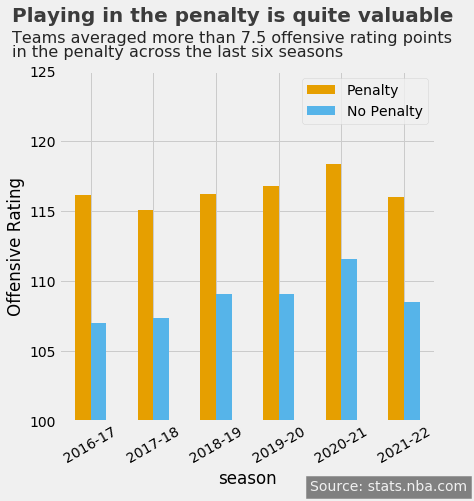

In [106]:
plt.style.use('fivethirtyeight')

colors = [[230/255,159/255,0], [86/255,180/255,233/255]]

ortg_plot = season_total_df.plot.bar(x="season", y=["Penalty", "No Penalty"], rot=30, color=colors, figsize=(6, 6))
ortg_plot.tick_params(axis = 'both', which = 'major', labelsize = 14)
ortg_plot.set_ylabel("Offensive Rating")
ortg_plot.set_ylim(100, 125)
ortg_plot.axhline(y = 100, color = 'black', linewidth = 1.3, alpha = .7)
ortg_plot.text(x = 3.5, y = 95,
    s = 'Source: stats.nba.com',fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')
ortg_plot.text(x = -1.25, y = 128.5, s = "Playing in the penalty is quite valuable",
               fontsize = 20, weight = 'bold', alpha = .75)
ortg_plot.text(x = -1.25, y = 127, s = "Teams averaged more than 7.5 offensive rating points",
               fontsize = 16, alpha = .85)
ortg_plot.text(x = -1.25, y = 126, s = "in the penalty across the last six seasons",
               fontsize = 16, alpha = .85)

## Free Throws Gained in the Penalty

With the increase in offensive production while in the penalty noted, how much are teams benefiting from free throw attempts gained in the penalty? These are free throws resulting from non-shooting fouls in the penalty, which would otherwise result in an inbound for the team being fouled. The following takes a look at free throws gained in the penalty versus overall team offensive rating.

In [126]:
current_df = team_fouls_df[team_fouls_df["season"] == "2021-22"]

In [127]:
current_df = current_df[current_df["team_id"].isin([int(x) for x in ID_TO_TEAM_NBA])]
current_df["Team"] = [ID_TO_TEAM_NBA[str(x)] for x in current_df["team_id"]]
team_df = pd.DataFrame(current_df.groupby(["Team", "team_id"])[["own_percent_tib", "ft_gained"]].agg(["mean"])).reset_index()
team_df.columns = ["Team", "team_id", "Percent of Game in Penalty", "Free Throw Attempts Gained per Game"]
team_df.sort_values("Percent of Game in Penalty")

,Team,team_id,Percent of Game in Penalty,Free Throw Attempts Gained per Game
20,OKC,1610612760,0.177748,2.685714
21,ORL,1610612753,0.186632,3.555556
26,SAS,1610612759,0.190213,2.705882
15,MIA,1610612748,0.195713,3.722222
23,PHX,1610612756,0.197766,5.028571
27,TOR,1610612761,0.199272,3.125000
9,GSW,1610612744,0.203801,3.705882
12,LAC,1610612746,0.208102,3.444444
7,DEN,1610612743,0.208326,3.090909
3,CHA,1610612766,0.209645,3.722222


In [128]:
ortg_df = pd.DataFrame(current_df.groupby(["Team", "team_id"])[["off_points_p",
                                                                   "off_poss_p",
                                                                   "off_points_np",
                                                                   "off_poss_np",]].agg(["sum"])).reset_index()
ortg_df.columns = ["Team", "team_id", "off_points_p", "off_poss_p", "off_points_np", "off_poss_np"]
ortg_df["Offensive Rating"] = 100*(ortg_df["off_points_p"] + ortg_df["off_points_np"]) / (ortg_df["off_poss_p"] + ortg_df["off_poss_np"])
team_df = team_df.merge(ortg_df[["Team", "team_id", "Offensive Rating"]], on=["Team", "team_id"])
team_df.sort_values("Free Throw Attempts Gained per Game")

,Team,team_id,Percent of Game in Penalty,Free Throw Attempts Gained per Game,Offensive Rating
20,OKC,1610612760,0.177748,2.685714,102.318973
26,SAS,1610612759,0.190213,2.705882,111.360829
7,DEN,1610612743,0.208326,3.090909,109.620468
27,TOR,1610612761,0.199272,3.125000,110.668411
18,NOP,1610612740,0.227106,3.200000,108.196957
19,NYK,1610612752,0.233063,3.333333,109.885305
8,DET,1610612765,0.229601,3.393939,101.629513
12,LAC,1610612746,0.208102,3.444444,107.479657
21,ORL,1610612753,0.186632,3.555556,103.601148
25,SAC,1610612758,0.246764,3.621622,109.142440


In [129]:
np.corrcoef(team_df["Free Throw Attempts Gained per Game"], team_df["Offensive Rating"])

array([[1.        , 0.52217398],
       [0.52217398, 1.        ]])

As trips to the free throw line are associated with high expected points, these additional free throws correlate with team offensive rating. This relationship is visualized below.

Text(2.75, 102.4, 'OKC')

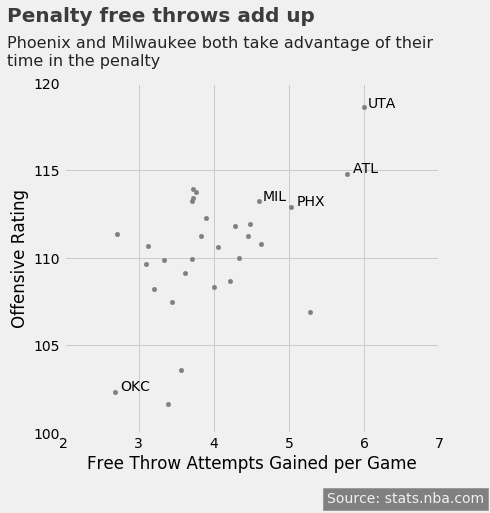

In [130]:
team_plot = team_df.plot.scatter(x="Free Throw Attempts Gained per Game", y="Offensive Rating", c="grey", figsize=(6, 6))
team_plot.tick_params(axis = 'both', which = 'major', labelsize = 14)
team_plot.set_yticks([100, 105, 110, 115, 120])
team_plot.set_xlabel("Free Throw Attempts Gained per Game")
team_plot.set_ylabel("Offensive Rating")
team_plot.set_xlim(2, 7)
team_plot.set_ylim(100, 120)
team_plot.text(x = 5.5, y = 96,
    s = 'Source: stats.nba.com',fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')
team_plot.text(x = 1.25, y = 123.5, s = "Penalty free throws add up",
               fontsize = 20, weight = 'bold', alpha = .75)
team_plot.text(x = 1.25, y = 122, s = "Phoenix and Milwaukee both take advantage of their",
               fontsize = 16, alpha = .85)
team_plot.text(x = 1.25, y = 121, s = "time in the penalty",
               fontsize = 16, alpha = .85)
team_plot.text(x=6.05, y=118.6, s="UTA")
team_plot.text(x=5.85, y=114.9, s="ATL")
team_plot.text(x=5.1, y=113, s="PHX")
team_plot.text(x=4.65, y=113.3, s="MIL")
team_plot.text(x=2.75, y=102.4, s="OKC")